In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl


import matplotlib
import matplotlib.font_manager
font = {'family' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)
matplotlib.rc("text", usetex=False)

In [2]:
 def export_legend(legend, filename):
        fig  = legend.figure
        fig.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(filename, dpi=300, bbox_inches=bbox)

In [3]:
def plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name):
    plt.clf()
    msize = 8
    
    for data_y, labels, color, marker in zip(data_y_all, labels_all, colors_all, markers_all): 
    
        plt.plot(data_x, data_y, scaley=True, color=color,
                 label=labels, marker=marker,# markersize=msize,
                 linestyle="-",)
    
    plt.xlabel("Fraction of Recourse ($b$)")
    plt.ylabel("Recourse Accuracy")
    
    plt.xticks(np.arange(min(data_x), 1.01, 0.2))
    
#     plt.title(title)
    
    plt.grid(True, alpha=0.5, linewidth=1, color="gray", linestyle=":")
    
#         Only for syn
    if "syn" in save_name:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.savefig(f"./{save_name}.png", dpi=300, bbox_inches = "tight")
    
    legend = plt.legend(ncol=1, shadow=False, fancybox=False, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0., 
                    labelspacing = 1.5)
    export_legend(legend, f"legend_{save_name}.png")
    plt.show()

In [4]:
def plot_hist(ourm, joint, their, constant, title, fname):
    
    barWidth = 0.15
    
    # Set position of bar on X axis
    r1 = np.arange(10)
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # Make the plot
    plt.bar(r1, their, color='blue', width=barWidth, edgecolor='white', label='Only $\phi$')
    plt.bar(r2, joint, color='green', width=barWidth, edgecolor='white', label='Joint')
    plt.bar(r3, constant, color='black', width=barWidth, edgecolor='white', label='Constant prediction')
    plt.bar(r4, ourm, color='red', width=barWidth, edgecolor='white', label='Joint Prior')

    # Add xticks on the middle of the group bars
    plt.ylabel("Recourse Accuracy")
    plt.xticks([r for r in range(10)], ['Aeroplane', 'Bench', 'Bus', 'Cabinet', 'Chair', 'Display', 'Knife', 'Lamp', 'Speaker', 'Gun'], rotation=75)
    plt.grid(linestyle="dotted")
    
   
#     plt.title(title)
    plt.savefig(f"./{fname}.png", dpi=300, bbox_inches = "tight")
    
    legend = plt.legend(ncol=1, shadow=False, fancybox=False, bbox_to_anchor=(1, 2), loc=2, borderaxespad=0., 
                    labelspacing = 1.5)
    export_legend(legend, f"legend_{fname}.png")
    plt.show()

In [5]:
frac_list = [0.02*i for i in range(51)]

# Triage

## Shapenet-small

In [6]:
score = [0.4816666543483734, 0.4877777695655823, 0.4923610985279083, 0.5002777576446533, 0.5069444179534912, 0.5140277743339539, 0.5218055844306946, 0.5262500047683716, 0.5316666960716248, 0.5380555391311646, 0.5431944727897644, 0.5469444394111633, 0.5515277981758118, 0.5561110973358154, 0.5634722113609314, 0.5683333277702332, 0.5736111402511597, 0.5788888931274414, 0.5827777981758118, 0.5870833396911621, 0.5912500023841858, 0.5955555438995361, 0.6005555391311646, 0.601527750492096, 0.6045833230018616, 0.6068055629730225, 0.6090278029441833, 0.6120833158493042, 0.6133333444595337, 0.6151388883590698, 0.6175000071525574, 0.6198611259460449, 0.6218055486679077, 0.6244444251060486, 0.6256944537162781, 0.6266666650772095, 0.627916693687439, 0.629444420337677, 0.6293055415153503, 0.6281944513320923, 0.6286110877990723, 0.629444420337677, 0.6293055415153503, 0.6295833587646484, 0.629027783870697, 0.629027783870697, 0.629027783870697, 0.6280555725097656, 0.6276388764381409, 0.6273611187934875, 0.6269444227218628]
full = [0.4816666543483734, 0.4898611009120941, 0.49694445729255676, 0.5054166913032532, 0.5133333206176758, 0.519861102104187, 0.527916669845581, 0.5355555415153503, 0.5433333516120911, 0.5493055582046509, 0.5558333396911621, 0.5593055486679077, 0.5637500286102295, 0.5687500238418579, 0.5724999904632568, 0.5773611068725586, 0.5827777981758118, 0.5861111283302307, 0.5899999737739563, 0.5950000286102295, 0.5991666913032532, 0.6036111116409302, 0.6072221994400024, 0.6101388931274414, 0.6127777695655823, 0.6148611307144165, 0.6150000095367432, 0.6170833110809326, 0.6188889145851135, 0.6194444298744202, 0.6202777624130249, 0.6204166412353516, 0.6200000047683716, 0.6206944584846497, 0.620555579662323, 0.6227777600288391, 0.6236110925674438, 0.6244444251060486, 0.6256944537162781, 0.6258333325386047, 0.6276388764381409, 0.6265277862548828, 0.6272222399711609, 0.6268055438995361, 0.6272222399711609, 0.6276388764381409, 0.6273611187934875, 0.6263889074325562, 0.6266666650772095, 0.6272222399711609, 0.6269444227218628]
ourm = [0.5995833277702332, 0.6052777767181396, 0.6148611307144165, 0.6212499737739563, 0.6270833611488342, 0.6351388692855835, 0.6413888931274414, 0.6461111307144165, 0.6531944274902344, 0.6573610901832581, 0.6619444489479065, 0.6659722328186035, 0.6722221970558167, 0.6768055558204651, 0.6802777647972107, 0.6855555772781372, 0.6888889074325562, 0.6938889026641846, 0.6972222328186035, 0.699999988079071, 0.7043055295944214, 0.7079166769981384, 0.7101389169692993, 0.7127777934074402, 0.7169444561004639, 0.7186111211776733, 0.7226389050483704, 0.7245833277702332, 0.727222204208374, 0.7279166579246521, 0.7304166555404663, 0.7306944727897644, 0.7325000166893005, 0.7329166531562805, 0.7352777719497681, 0.7373611330986023, 0.7387499809265137, 0.7394444346427917, 0.7402777671813965, 0.741527795791626, 0.742222249507904, 0.7433333396911621, 0.7450000047683716, 0.7454166412353516, 0.7456944584846497, 0.7458333373069763, 0.745972216129303, 0.745555579662323, 0.7465277910232544, 0.7472222447395325, 0.7444444298744202]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


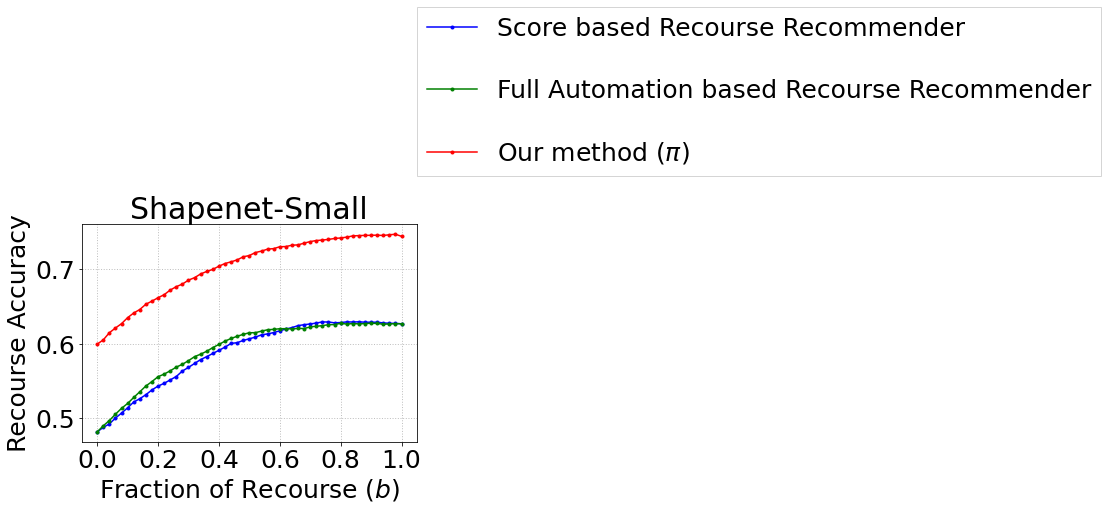

In [7]:
data_x = frac_list
data_y_all = [score, full, ourm]
labels_all = ["Score based Recourse Recommender", "Full Automation based Recourse Recommender", "Our method ($\pi$)"]
colors_all = ["b", "g", "r"]
markers_all = [".", ".", "."]
title = "Shapenet-Small"
save_name = "triage_small"
plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

## Shapenet-Large

In [8]:
score = [0.5906944274902344, 0.5954166650772095, 0.6034722328186035, 0.6111111044883728, 0.6184722185134888, 0.6259722113609314, 0.6343055367469788, 0.6402778029441833, 0.6474999785423279, 0.6549999713897705, 0.6601389050483704, 0.6656944155693054, 0.6706944704055786, 0.6744444370269775, 0.6800000071525574, 0.6831944584846497, 0.6858333349227905, 0.6890277862548828, 0.6918055415153503, 0.6936110854148865, 0.6973611116409302, 0.7002778053283691, 0.7020833492279053, 0.7065277695655823, 0.7094444632530212, 0.7118055820465088, 0.7144444584846497, 0.7184722423553467, 0.7212499976158142, 0.7241666913032532, 0.7248610854148865, 0.7259722352027893, 0.727222204208374, 0.7280555367469788, 0.7284722328186035, 0.7309722304344177, 0.7320833206176758, 0.7326388955116272, 0.7338888645172119, 0.7330555319786072, 0.7344444394111633, 0.7340278029441833, 0.7338888645172119, 0.7334722280502319, 0.7336111068725586, 0.7326388955116272, 0.7316666841506958, 0.7309722304344177, 0.7304166555404663, 0.7300000190734863, 0.7291666865348816]
full = [0.5906944274902344, 0.5998610854148865, 0.6088888645172119, 0.617638885974884, 0.6241666674613953, 0.6306944489479065, 0.6351388692855835, 0.6380555629730225, 0.6427778005599976, 0.6470833420753479, 0.6524999737739563, 0.6575000286102295, 0.6619444489479065, 0.6663888692855835, 0.6718055605888367, 0.6747221946716309, 0.6795833110809326, 0.6831944584846497, 0.6865277886390686, 0.6891666650772095, 0.6912500262260437, 0.6951388716697693, 0.6984722018241882, 0.7005555629730225, 0.7037500143051147, 0.7059721946716309, 0.7084722518920898, 0.7095833420753479, 0.711388885974884, 0.7131944298744202, 0.7136111259460449, 0.7138888835906982, 0.7149999737739563, 0.7152777910232544, 0.7165277600288391, 0.7188888788223267, 0.7191666960716248, 0.7191666960716248, 0.7211111187934875, 0.7212499976158142, 0.7226389050483704, 0.7238888740539551, 0.7255555391311646, 0.7263888716697693, 0.7279166579246521, 0.7288888692855835, 0.7290277481079102, 0.7284722328186035, 0.7297222018241882, 0.7287499904632568, 0.7291666865348816]
ourm = [0.6800000071525574, 0.6876388788223267, 0.6949999928474426, 0.7022222280502319, 0.7093055844306946, 0.7149999737739563, 0.7204166650772095, 0.7251389026641846, 0.7308333516120911, 0.7359722256660461, 0.7425000071525574, 0.7468055486679077, 0.7504166960716248, 0.754027783870697, 0.7574999928474426, 0.7620833516120911, 0.7649999856948853, 0.7674999833106995, 0.7701388597488403, 0.7716666460037231, 0.773472249507904, 0.7737500071525574, 0.7759722471237183, 0.776805579662323, 0.7773610949516296, 0.7795833349227905, 0.7806944251060486, 0.78125, 0.7822222113609314, 0.7827777862548828, 0.7831944227218628, 0.7833333611488342, 0.7840277552604675, 0.784583330154419, 0.7848610877990723, 0.7838888764381409, 0.7836111187934875, 0.7836111187934875, 0.7829166650772095, 0.7831944227218628, 0.7834722399711609, 0.7837499976158142, 0.7826389074325562, 0.7819444537162781, 0.7813888788223267, 0.7820833325386047, 0.7816666960716248, 0.7798610925674438, 0.7781944274902344, 0.7755555510520935, 0.7726389169692993]

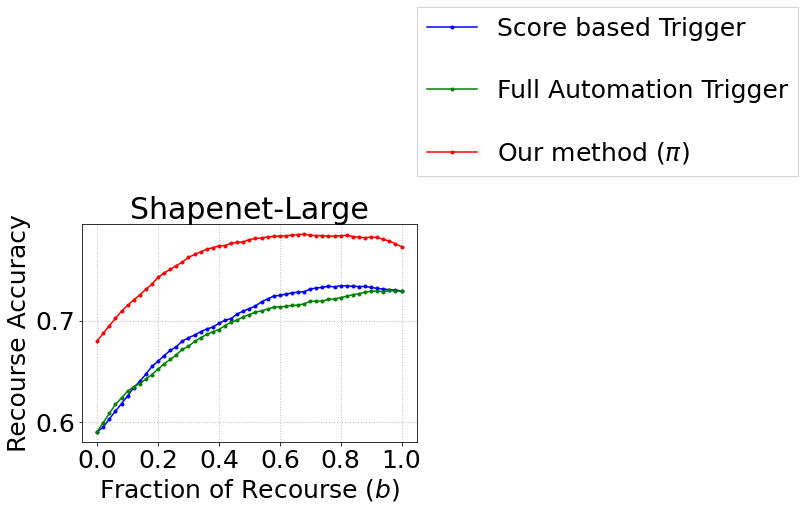

In [9]:
data_x = frac_list
data_y_all = [score, full, ourm]
labels_all = ["Score based Trigger", "Full Automation Trigger", "Our method ($\pi$)"]
colors_all = ["b", "g", "r"]
markers_all = [".", ".", "."]
title = "Shapenet-Large"
save_name = "triage_large"
plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

## Synthetic

In [10]:
score = [0.7300000190734863, 0.7400000095367432, 0.7537500262260437, 0.768750011920929, 0.7837499976158142, 0.7950000166893005, 0.8075000047683716, 0.8162500262260437, 0.8299999833106995, 0.8374999761581421, 0.8462499976158142, 0.8587499856948853, 0.8687499761581421, 0.8812500238418579, 0.8912500143051147, 0.9049999713897705, 0.9175000190734863, 0.925000011920929, 0.9362499713897705, 0.9449999928474426, 0.9549999833106995, 0.9624999761581421, 0.9725000262260437, 0.9825000166893005, 0.9912499785423279, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
full = [0.7300000190734863, 0.7325000166893005, 0.7350000143051147, 0.7362499833106995, 0.7362499833106995, 0.7412499785423279, 0.7450000047683716, 0.7512500286102295, 0.7537500262260437, 0.7587500214576721, 0.7662500143051147, 0.768750011920929, 0.7699999809265137, 0.7724999785423279, 0.7774999737739563, 0.78125, 0.7900000214576721, 0.7987499833106995, 0.8050000071525574, 0.8149999976158142, 0.8212500214576721, 0.8287500143051147, 0.8324999809265137, 0.8349999785423279, 0.8424999713897705, 0.8512499928474426, 0.8587499856948853, 0.8662499785423279, 0.8799999952316284, 0.8862500190734863, 0.8962500095367432, 0.90625, 0.918749988079071, 0.9275000095367432, 0.9399999976158142, 0.9449999928474426, 0.9524999856948853, 0.956250011920929, 0.9612500071525574, 0.96875, 0.9750000238418579, 0.9775000214576721, 0.9837499856948853, 0.987500011920929, 0.9925000071525574, 0.9925000071525574, 0.9950000047683716, 0.9962499737739563, 1.0, 1.0, 1.0]
ourm = [0.7674999833106995, 0.7825000286102295, 0.7925000190734863, 0.8012499809265137, 0.8137500286102295, 0.8287500143051147, 0.8374999761581421, 0.8462499976158142, 0.8537499904632568, 0.8575000166893005, 0.8612499833106995, 0.8700000047683716, 0.8787500262260437, 0.8849999904632568, 0.8949999809265137, 0.9012500047683716, 0.9100000262260437, 0.9212499856948853, 0.9325000047683716, 0.9399999976158142, 0.949999988079071, 0.9599999785423279, 0.96875, 0.9775000214576721, 0.987500011920929, 0.9987499713897705, 0.9987499713897705, 0.9987499713897705, 0.9987499713897705, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

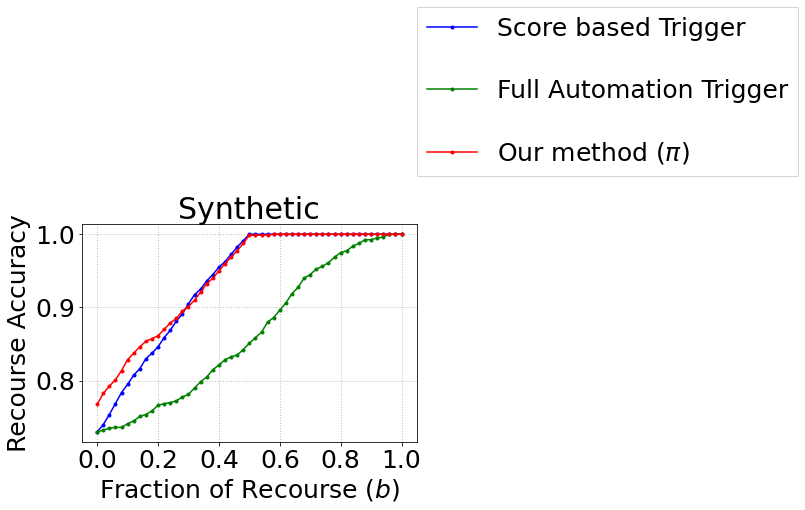

In [11]:
data_x = frac_list
data_y_all = [score, full, ourm]
labels_all = ["Score based Trigger", "Full Automation Trigger", "Our method ($\pi$)"]
colors_all = ["b", "g", "r"]
markers_all = [".", ".", "."]
title = "Synthetic"
save_name = "triage_syn"
plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

# Recourse recommender

## Shapenet- small

In [12]:
ourm = [0.5995833277702332, 0.6052777767181396, 0.6148611307144165, 0.6212499737739563, 0.6270833611488342, 0.6351388692855835, 0.6413888931274414, 0.6461111307144165, 0.6531944274902344, 0.6573610901832581, 0.6619444489479065, 0.6659722328186035, 0.6722221970558167, 0.6768055558204651, 0.6802777647972107, 0.6855555772781372, 0.6888889074325562, 0.6938889026641846, 0.6972222328186035, 0.699999988079071, 0.7043055295944214, 0.7079166769981384, 0.7101389169692993, 0.7127777934074402, 0.7169444561004639, 0.7186111211776733, 0.7226389050483704, 0.7245833277702332, 0.727222204208374, 0.7279166579246521, 0.7304166555404663, 0.7306944727897644, 0.7325000166893005, 0.7329166531562805, 0.7352777719497681, 0.7373611330986023, 0.7387499809265137, 0.7394444346427917, 0.7402777671813965, 0.741527795791626, 0.742222249507904, 0.7433333396911621, 0.7450000047683716, 0.7454166412353516, 0.7456944584846497, 0.7458333373069763, 0.745972216129303, 0.745555579662323, 0.7465277910232544, 0.7472222447395325, 0.7444444298744202]
joint = [0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5995833277702332, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5998610854148865, 0.5998610854148865, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5997222065925598, 0.5998610854148865, 0.5998610854148865, 0.5998610854148865, 0.5998610854148865, 0.6001389026641846, 0.6001389026641846, 0.6002777814865112, 0.6005555391311646, 0.6005555391311646, 0.6005555391311646, 0.6005555391311646, 0.6005555391311646, 0.6005555391311646, 0.6005555391311646, 0.6006944179534912, 0.6006944179534912, 0.6008333563804626, 0.6009722352027893, 0.6009722352027893, 0.601111114025116, 0.601111114025116]
their = [0.5995833277702332, 0.6056944727897644, 0.6159722208976746, 0.6259722113609314, 0.632777750492096, 0.6390277743339539, 0.6459722518920898, 0.6505555510520935, 0.6572222113609314, 0.6645833253860474, 0.6695833206176758, 0.6747221946716309, 0.679444432258606, 0.6840277910232544, 0.6879166960716248, 0.6920833587646484, 0.6968055367469788, 0.6997222304344177, 0.7023611068725586, 0.7045833468437195, 0.7095833420753479, 0.7123610973358154, 0.714722216129303, 0.7169444561004639, 0.7205555438995361, 0.7236111164093018, 0.7259722352027893, 0.7276389002799988, 0.7284722328186035, 0.7287499904632568, 0.7308333516120911, 0.7309722304344177, 0.7329166531562805, 0.7340278029441833, 0.7347221970558167, 0.7355555295944214, 0.7352777719497681, 0.7359722256660461, 0.7361111044883728, 0.7370833158493042, 0.7352777719497681, 0.7348611354827881, 0.7331944704055786, 0.7320833206176758, 0.7308333516120911, 0.7295833230018616, 0.7280555367469788, 0.721666693687439, 0.7165277600288391, 0.7094444632530212, 0.698888897895813]
constant = [0.5995833277702332, 0.6045833230018616, 0.613611102104187, 0.6227777600288391, 0.6288889050483704, 0.6344444155693054, 0.6402778029441833, 0.6449999809265137, 0.6506944298744202, 0.6575000286102295, 0.6625000238418579, 0.6697221994400024, 0.6763888597488403, 0.6813889145851135, 0.6873611211776733, 0.6922222375869751, 0.6947222352027893, 0.6974999904632568, 0.7015277743339539, 0.7034721970558167, 0.7061111330986023, 0.7094444632530212, 0.7123610973358154, 0.7130555510520935, 0.715416669845581, 0.7170833349227905, 0.7191666960716248, 0.7206944227218628, 0.7229166626930237, 0.7248610854148865, 0.7259722352027893, 0.7262499928474426, 0.7276389002799988, 0.727222204208374, 0.7284722328186035, 0.730555534362793, 0.7322221994400024, 0.7319444417953491, 0.7318055629730225, 0.7327777743339539, 0.7326388955116272, 0.7315278053283691, 0.7309722304344177, 0.7306944727897644, 0.7293055653572083, 0.7279166579246521, 0.7237499952316284, 0.7184722423553467, 0.7159722447395325, 0.7105555534362793, 0.7049999833106995]

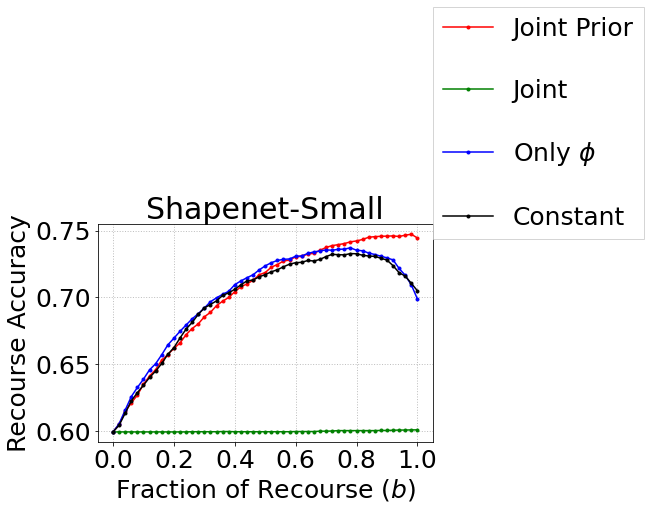

In [13]:
data_x = frac_list
data_y_all = [ourm, joint, their, constant]
labels_all = ["Joint Prior",  "Joint", "Only $\phi$", "Constant"]
colors_all = ["r", "g", "b", "black"]
markers_all = [".", ".", ".", "."]
title = "Shapenet-Small"
save_name = "phi_small"

plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

## Shapenel-Large

In [14]:
ourm = [0.6800000071525574, 0.6876388788223267, 0.6949999928474426, 0.7022222280502319, 0.7093055844306946, 0.7149999737739563, 0.7204166650772095, 0.7251389026641846, 0.7308333516120911, 0.7359722256660461, 0.7425000071525574, 0.7468055486679077, 0.7504166960716248, 0.754027783870697, 0.7574999928474426, 0.7620833516120911, 0.7649999856948853, 0.7674999833106995, 0.7701388597488403, 0.7716666460037231, 0.773472249507904, 0.7737500071525574, 0.7759722471237183, 0.776805579662323, 0.7773610949516296, 0.7795833349227905, 0.7806944251060486, 0.78125, 0.7822222113609314, 0.7827777862548828, 0.7831944227218628, 0.7833333611488342, 0.7840277552604675, 0.784583330154419, 0.7848610877990723, 0.7838888764381409, 0.7836111187934875, 0.7836111187934875, 0.7829166650772095, 0.7831944227218628, 0.7834722399711609, 0.7837499976158142, 0.7826389074325562, 0.7819444537162781, 0.7813888788223267, 0.7820833325386047, 0.7816666960716248, 0.7798610925674438, 0.7781944274902344, 0.7755555510520935, 0.7726389169692993]
joint = [0.6800000071525574, 0.6869444251060486, 0.6924999952316284, 0.6983333230018616, 0.7054166793823242, 0.7120833396911621, 0.7162500023841858, 0.7233333587646484, 0.7294444441795349, 0.7347221970558167, 0.7387499809265137, 0.742222249507904, 0.745972216129303, 0.7486110925674438, 0.7512500286102295, 0.7536110877990723, 0.7549999952316284, 0.7568055391311646, 0.758472204208374, 0.7595833539962769, 0.762499988079071, 0.7643055319786072, 0.7644444704055786, 0.7666666507720947, 0.7680555582046509, 0.7695833444595337, 0.7697222232818604, 0.7697222232818604, 0.7699999809265137, 0.7693055272102356, 0.7693055272102356, 0.7686111330986023, 0.7673611044883728, 0.7670833468437195, 0.7665277719497681, 0.7670833468437195, 0.7674999833106995, 0.7659721970558167, 0.7656944394111633, 0.7655555605888367, 0.7641666531562805, 0.7641666531562805, 0.7640277743339539, 0.7629166841506958, 0.761805534362793, 0.7602777481079102, 0.7587500214576721, 0.757361114025116, 0.7537500262260437, 0.7476388812065125, 0.7451388835906982]
their = [0.6800000071525574, 0.6879166960716248, 0.6949999928474426, 0.7016666531562805, 0.7087500095367432, 0.7145833373069763, 0.7209722399711609, 0.7266666889190674, 0.7325000166893005, 0.7361111044883728, 0.7394444346427917, 0.7441666722297668, 0.746666669845581, 0.7493055462837219, 0.7511110901832581, 0.7537500262260437, 0.7549999952316284, 0.7562500238418579, 0.7568055391311646, 0.7588889002799988, 0.7595833539962769, 0.7601388692855835, 0.7605555653572083, 0.7622222304344177, 0.762499988079071, 0.7622222304344177, 0.762499988079071, 0.7638888955116272, 0.7640277743339539, 0.7643055319786072, 0.7648611068725586, 0.7652778029441833, 0.7655555605888367, 0.7652778029441833, 0.7630555629730225, 0.7634721994400024, 0.7627778053283691, 0.7619444727897644, 0.7605555653572083, 0.7598611116409302, 0.7586110830307007, 0.758055567741394, 0.7559722065925598, 0.7536110877990723, 0.7504166960716248, 0.7463889122009277, 0.7413889169692993, 0.7368055582046509, 0.7308333516120911, 0.7255555391311646, 0.722083330154419]
constant = [0.6800000071525574, 0.6884722113609314, 0.6969444155693054, 0.7030555605888367, 0.7098610997200012, 0.7162500023841858, 0.7209722399711609, 0.7262499928474426, 0.7319444417953491, 0.7377777695655823, 0.7418055534362793, 0.7463889122009277, 0.7512500286102295, 0.754444420337677, 0.7587500214576721, 0.7619444727897644, 0.7648611068725586, 0.7676388621330261, 0.7695833444595337, 0.772777795791626, 0.773888885974884, 0.7766666412353516, 0.7774999737739563, 0.7776389122009277, 0.7788888812065125, 0.7802777886390686, 0.78125, 0.7819444537162781, 0.7819444537162781, 0.7830555438995361, 0.7830555438995361, 0.7834722399711609, 0.7827777862548828, 0.7826389074325562, 0.7827777862548828, 0.7827777862548828, 0.7822222113609314, 0.7811111211776733, 0.7801389098167419, 0.7797222137451172, 0.7791666388511658, 0.776805579662323, 0.7751389145851135, 0.772777795791626, 0.7709722518920898, 0.7704166769981384, 0.7680555582046509, 0.7652778029441833, 0.7626388669013977, 0.7590277791023254, 0.7512500286102295]

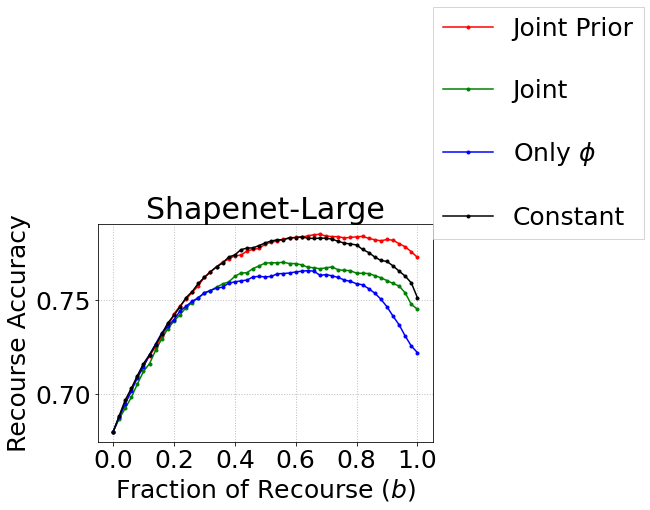

In [15]:
data_x = frac_list
data_y_all = [ourm, joint, their, constant]
labels_all = ["Joint Prior",  "Joint", "Only $\phi$", "Constant"]
colors_all = ["r", "g", "b", "black"]
markers_all = [".", ".", ".", "."]
title = "Shapenet-Large"
save_name = "phi_large"

plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

## Synthetic

In [16]:
ourm = [0.7674999833106995, 0.7825000286102295, 0.7925000190734863, 0.8012499809265137, 0.8137500286102295, 0.8287500143051147, 0.8374999761581421, 0.8462499976158142, 0.8537499904632568, 0.8575000166893005, 0.8612499833106995, 0.8700000047683716, 0.8787500262260437, 0.8849999904632568, 0.8949999809265137, 0.9012500047683716, 0.9100000262260437, 0.9212499856948853, 0.9325000047683716, 0.9399999976158142, 0.949999988079071, 0.9599999785423279, 0.96875, 0.9775000214576721, 0.987500011920929, 0.9987499713897705, 0.9987499713897705, 0.9987499713897705, 0.9987499713897705, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
joint = [0.7674999833106995, 0.78125, 0.7912499904632568, 0.8012499809265137, 0.8137500286102295, 0.8287500143051147, 0.8374999761581421, 0.8462499976158142, 0.8537499904632568, 0.8575000166893005, 0.862500011920929, 0.8712499737739563, 0.8787500262260437, 0.8862500190734863, 0.8949999809265137, 0.9024999737739563, 0.9112499952316284, 0.9200000166893005, 0.9325000047683716, 0.9462500214576721, 0.9524999856948853, 0.9612500071525574, 0.9700000286102295, 0.981249988079071, 0.987500011920929, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9937499761581421, 0.9862499833106995, 0.9725000262260437, 0.96875, 0.9662500023841858]
their = [0.7674999833106995, 0.7724999785423279, 0.7774999737739563, 0.7799999713897705, 0.7875000238418579, 0.7975000143051147, 0.800000011920929, 0.8025000095367432, 0.8025000095367432, 0.8062499761581421, 0.8062499761581421, 0.8100000023841858, 0.8149999976158142, 0.8162500262260437, 0.8212500214576721, 0.8224999904632568, 0.8287500143051147, 0.8349999785423279, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8424999713897705, 0.8424999713897705, 0.8475000262260437, 0.8500000238418579, 0.8575000166893005, 0.8475000262260437, 0.8399999737739563, 0.8299999833106995, 0.8262500166893005, 0.8237500190734863, 0.8212500214576721, 0.8100000023841858, 0.8062499761581421, 0.8037499785423279, 0.800000011920929, 0.7950000166893005, 0.7875000238418579, 0.7799999713897705, 0.7749999761581421, 0.7674999833106995, 0.7537500262260437, 0.7400000095367432, 0.731249988079071, 0.7250000238418579, 0.7137500047683716, 0.7037500143051147, 0.6974999904632568, 0.6887500286102295, 0.6762499809265137, 0.6675000190734863]
constant = [0.7674999833106995, 0.7762500047683716, 0.7850000262260437, 0.7975000143051147, 0.8075000047683716, 0.8149999976158142, 0.824999988079071, 0.8349999785423279, 0.8475000262260437, 0.8575000166893005, 0.8700000047683716, 0.8812500238418579, 0.8899999856948853, 0.8987500071525574, 0.90625, 0.9150000214576721, 0.9212499856948853, 0.9287499785423279, 0.9337499737739563, 0.9424999952316284, 0.9462500214576721, 0.9462500214576721, 0.949999988079071, 0.9549999833106995, 0.9587500095367432, 0.9599999785423279, 0.9637500047683716, 0.9637500047683716, 0.9674999713897705, 0.9712499976158142, 0.9737499952316284, 0.9737499952316284, 0.9775000214576721, 0.9787499904632568, 0.981249988079071, 0.9850000143051147, 0.9950000047683716, 0.9912499785423279, 0.9912499785423279, 0.9900000095367432, 0.9887499809265137, 0.9887499809265137, 0.9887499809265137, 0.9887499809265137, 0.9887499809265137, 0.9787499904632568, 0.9737499952316284, 0.96875, 0.9674999713897705, 0.9662500023841858, 0.9662500023841858]

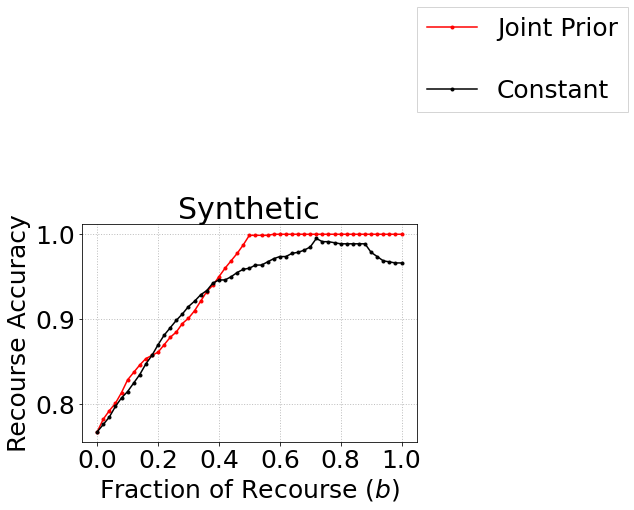

In [17]:
data_x = frac_list
# data_y_all = [ourm, joint, their, constant]
# labels_all = ["Joint Prior",  "Joint", "Only $\phi$", "Constant"]
# colors_all = ["r", "g", "b", "black"]
# markers_all = [".", ".", ".", "."]
# title = "Shapenet-Large"
# save_name = "phi_large"

data_y_all = [ourm, constant]
labels_all = ["Joint Prior", "Constant"]
colors_all = ["r", "black"]
markers_all = [".", "."]
title = "Synthetic"
save_name = "phi_syn"

plot_line(data_x, data_y_all, labels_all, colors_all, markers_all, title, save_name)

# Histogram

## Shapenet-small

In [18]:
ourm = [0.9166666865348816, 0.7166666388511658, 0.9111111164093018, 0.7680555582046509, 0.6805555820465088, 0.668055534362793, 0.875, 0.6986111402511597, 0.4166666567325592, 0.793055534362793]
joint = [0.7013888955116272, 0.637499988079071, 0.6611111164093018, 0.5708333253860474, 0.5402777791023254, 0.6097221970558167, 0.762499988079071, 0.4861111044883728, 0.3958333432674408, 0.6458333134651184]
constant = [0.9750000238418579, 0.800000011920929, 0.625, 0.699999988079071, 0.5874999761581421, 0.800000011920929, 0.987500011920929, 0.550000011920929, 0.512499988079071, 0.512499988079071]
theirs = [0.9208333492279053, 0.48750001192092896, 0.8694444298744202, 0.7847222089767456, 0.5486111044883728, 0.5444444417953491, 0.8930555582046509, 0.7222222089767456, 0.4833333194255829, 0.7347221970558167]

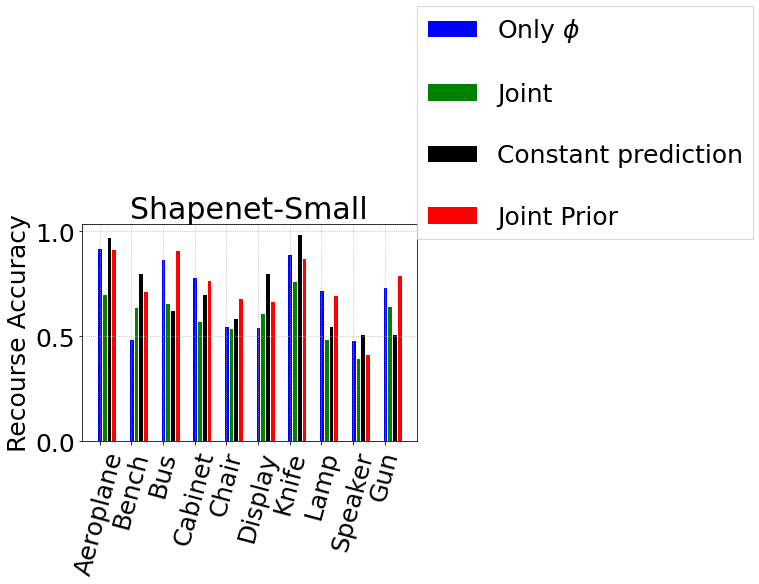

In [19]:
plot_hist(ourm=ourm, joint=joint, their=theirs, constant=constant, title="Shapenet-Small", fname="hist_small")

## Shapenet-Large

In [20]:
theirs = [0.9597222208976746, 0.4902777671813965,  0.8541666865348816,  0.4749999940395355,  0.7277777791023254,  0.6305555701255798,  0.8430555462837219,  0.8097222447395325,  0.5652777552604675,  0.8652777671813965]
joint = [0.9541666507720947,  0.6458333134651184,  0.8805555701255798,  0.375,  0.8194444179534912,  0.7055555582046509,  0.8694444298744202,  0.7458333373069763,  0.5958333611488342,  0.8597221970558167]
constant =  [0.949999988079071,  0.800000011920929,  0.8500000238418579,  0.20000000298023224,  0.8374999761581421,  0.8374999761581421,  0.8999999761581421,  0.6875,  0.625,  0.824999988079071]
ourm = [0.9527778029441833,  0.730555534362793,  0.8611111044883728,  0.4486111104488373,  0.831944465637207,  0.8152777552604675,  0.8652777671813965,  0.7638888955116272,  0.5680555701255798,  0.8277778029441833]

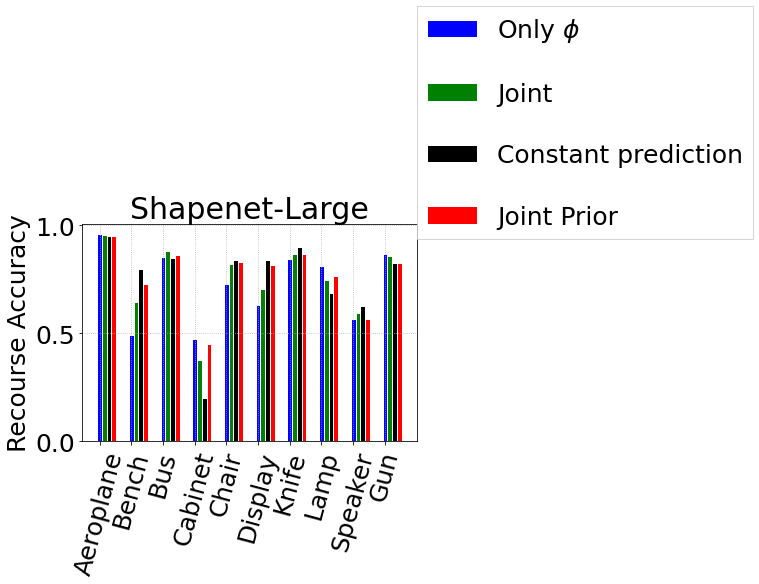

In [21]:
plot_hist(ourm=ourm, joint=joint, their=theirs, constant=constant, title="Shapenet-Large", fname="hist_large")